#Setup

In [2]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

In [3]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

In [4]:
# To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

#Initialisation
1st visualisation of the data attributes with their data types to better see and understand the dataset.

In [5]:
dataset = pd.read_csv('UK_Accident.csv')
dataset.describe()

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,41849.000000,41836.000000,41849.000000,41836.000000,41849.000000,41849.000000,41849.000000,41849.000000,41849.000000,41849.000000,41849.000000,41848.000000,41848.000000,41848.000000,41848.000000,41848.000000,41848.000000,41848.0
mean,20924.000000,466619.148341,267791.702311,-1.054319,52.281983,2.630170,2.856412,1.816507,1.282946,4.116251,44.789433,3.972878,796.575081,33.026907,3.195254,271.307040,1.111475,2005.0
std,12080.910044,86586.960355,119674.367200,1.266379,1.420374,4.316904,0.377265,0.670862,0.719546,1.919794,57.277481,1.326988,1595.683137,8.831782,3.001372,1019.094256,0.315936,0.0
min,0.000000,296300.000000,0.000000,-3.602717,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,10.000000,-1.000000,-1.000000,1.000000,2005.0
25%,10462.000000,368125.000000,178780.000000,-2.485412,51.493327,1.000000,3.000000,1.000000,1.000000,3.000000,11.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2005.0
50%,20924.000000,523280.000000,186750.000000,-0.224894,51.563637,1.000000,3.000000,2.000000,1.000000,4.000000,26.000000,3.000000,65.000000,30.000000,4.000000,0.000000,1.000000,2005.0
75%,31386.000000,532830.000000,395640.000000,-0.087151,53.455691,4.000000,3.000000,2.000000,1.000000,6.000000,77.000000,5.000000,540.000000,30.000000,6.000000,0.000000,1.000000,2005.0
max,41848.000000,559570.000000,573030.000000,0.300802,55.047995,48.000000,3.000000,13.000000,23.000000,7.000000,570.000000,6.000000,7076.000000,70.000000,6.000000,8228.000000,3.000000,2005.0


In [7]:
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41849 entries, 0 to 41848
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   41849 non-null  int64  
 1   Accident_Index                               41849 non-null  object 
 2   Location_Easting_OSGR                        41836 non-null  float64
 3   Location_Northing_OSGR                       41849 non-null  float64
 4   Longitude                                    41836 non-null  float64
 5   Latitude                                     41849 non-null  float64
 6   Police_Force                                 41849 non-null  int64  
 7   Accident_Severity                            41849 non-null  int64  
 8   Number_of_Vehicles                           41849 non-null  int64  
 9   Number_of_Casualties                         41849 non-null  int64  
 10

In [11]:
dataset["Weather_Conditions"].value_counts()

Fine without high winds       35349
Raining without high winds     4791
Other                           481
Unknown                         341
Fine with high winds            261
Raining with high winds         253
Snowing without high winds      216
Fog or mist                     139
Snowing with high winds          17
Name: Weather_Conditions, dtype: int64

In [12]:
dataset["Light_Conditions"].value_counts()

Daylight: Street light present               29830
Darkness: Street lights present and lit      11180
Darkeness: No street lighting                  557
Darkness: Street lighting unknown              146
Darkness: Street lights present but unlit      135
Name: Light_Conditions, dtype: int64

In [13]:
dataset["Road_Surface_Conditions"].value_counts()

Dry                          31865
Wet/Damp                      9481
Frost/Ice                      347
Snow                            90
Normal                          41
Flood (Over 3cm of water)       24
Name: Road_Surface_Conditions, dtype: int64

In [14]:
dataset["Junction_Control"].value_counts()

Giveway or uncontrolled     21303
None                        12896
Automatic traffic signal     7349
Stop Sign                     231
Authorised person              69
Name: Junction_Control, dtype: int64

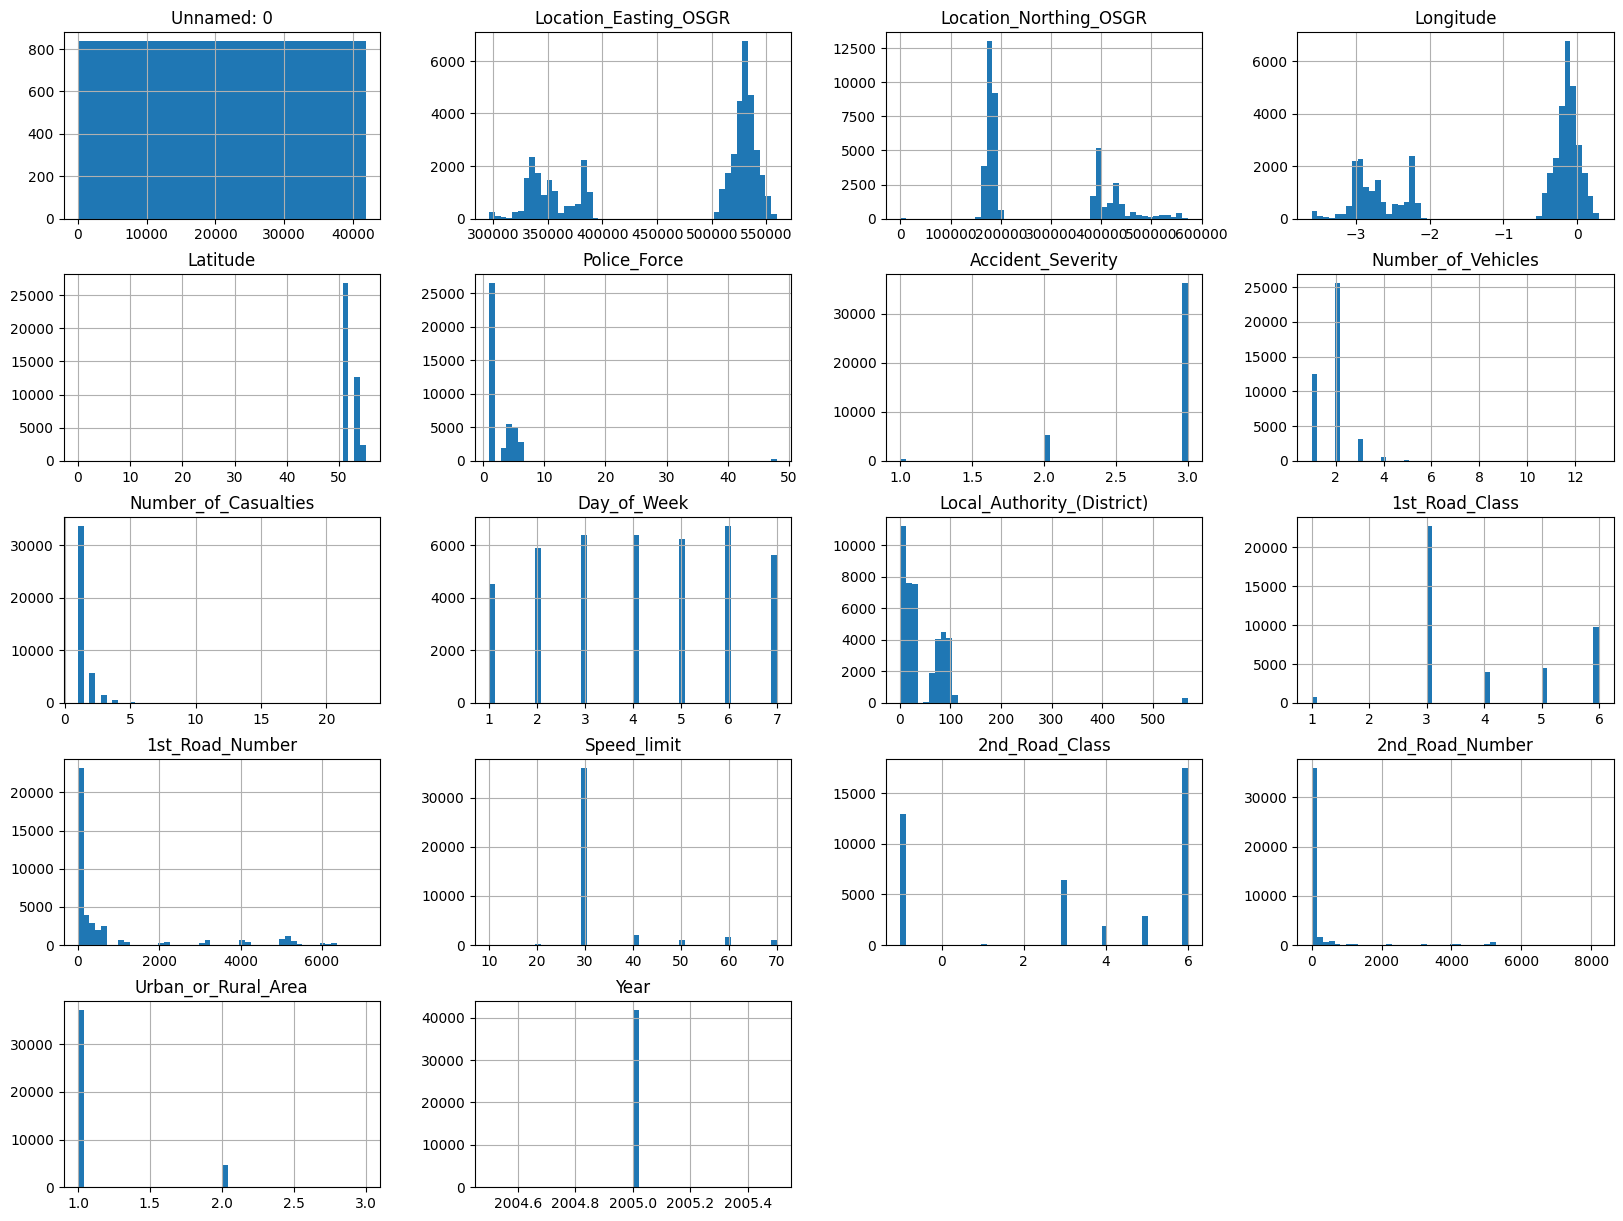

In [15]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

#Cleaning
Remove useless attributes to convert the useful one into numeric data

In [21]:
dataset = dataset.drop("Accident_Index", axis=1)
dataset.head()

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1.0,Yes,E01002849,2005.0
1,1,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1.0,Yes,E01002909,2005.0
2,2,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1.0,Yes,E01002857,2005.0
3,3,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1.0,Yes,E01002840,2005.0
4,4,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1.0,Yes,E01002863,2005.0


Import function to convert qualitative data into quantitative to further compute correlation.
The most interesting target for the correlation seems to be the time at which the car accidents (linked to the probability) occurs to define the best attributes that have an import factor on it. Need to convert time into timeslot with 24 categories for the time ranges.

In [31]:
corr_matrix = dataset.corr()
corr_matrix["Urban_or_Rural_Area"].sort_values(ascending=False)

<ipython-input-31-ad31553a49e9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


Urban_or_Rural_Area           1.000000
Speed_limit                   0.652419
Location_Northing_OSGR        0.429413
Latitude                      0.261475
Unnamed: 0                    0.242133
Local_Authority_(District)    0.148543
Number_of_Casualties          0.125933
Police_Force                  0.069798
1st_Road_Number               0.060944
Number_of_Vehicles            0.040703
2nd_Road_Number               0.005485
Day_of_Week                  -0.008251
Accident_Severity            -0.068596
1st_Road_Class               -0.104165
2nd_Road_Class               -0.172371
Location_Easting_OSGR        -0.381079
Longitude                    -0.382482
Year                               NaN
Name: Urban_or_Rural_Area, dtype: float64